# Kapitel 12

## SOM - Schlanke Variante

Trainieren die XOR Funktion


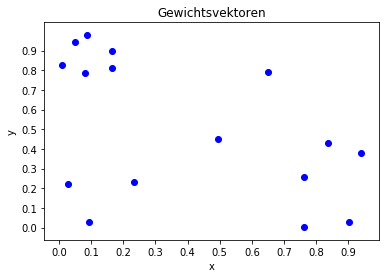

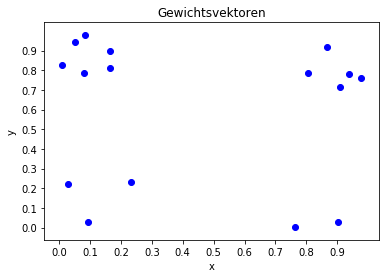

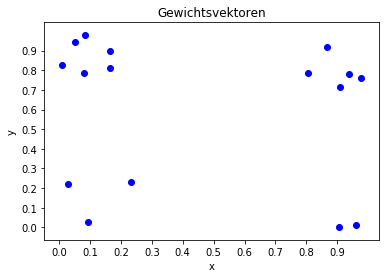

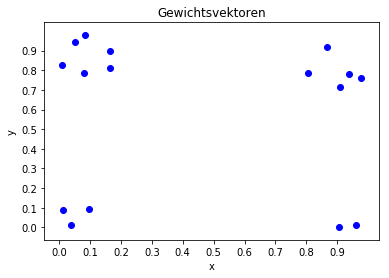

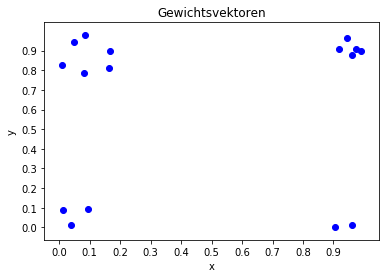

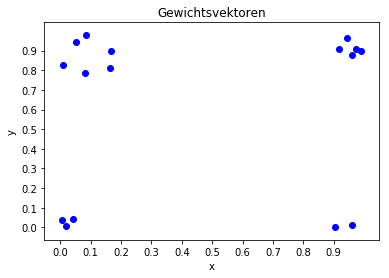

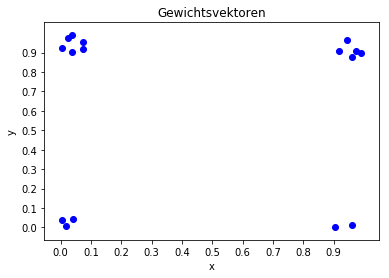

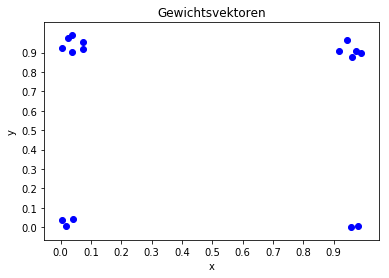

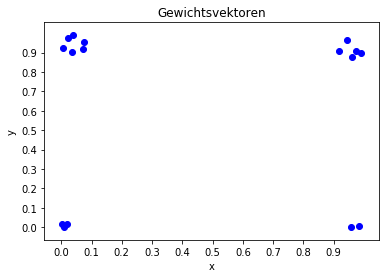

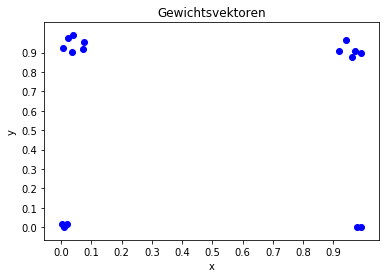

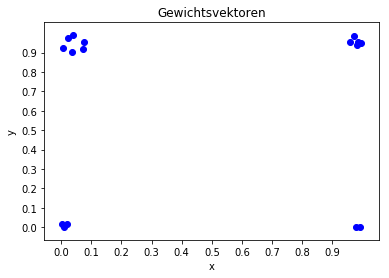

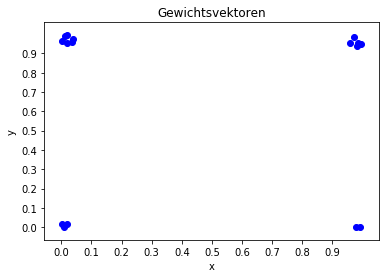

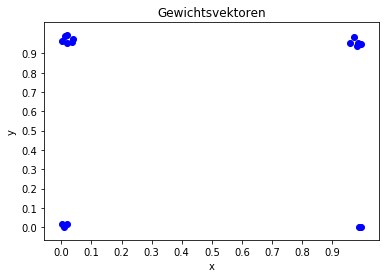

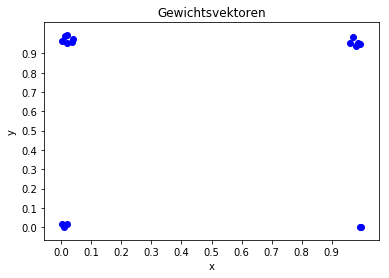

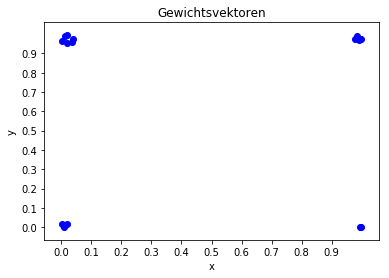

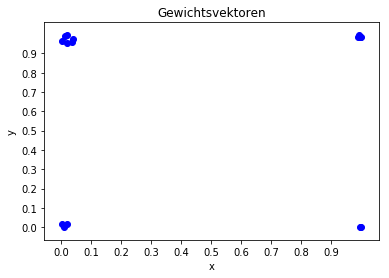

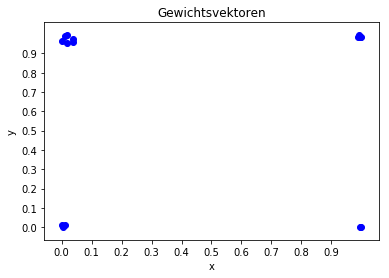

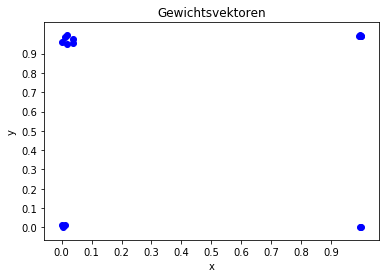

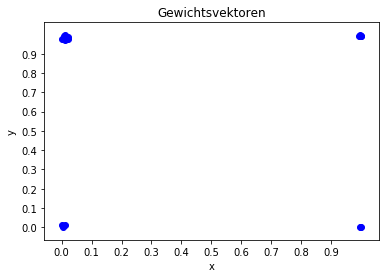

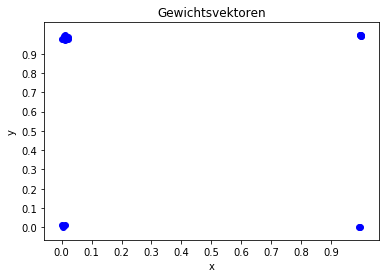

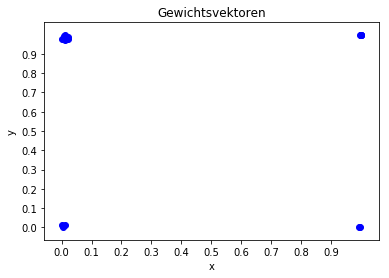

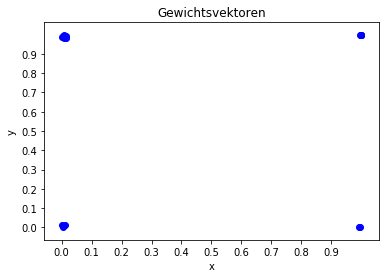

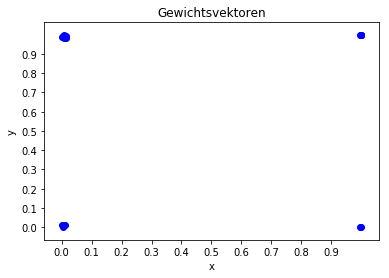

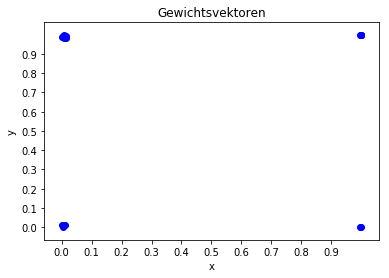

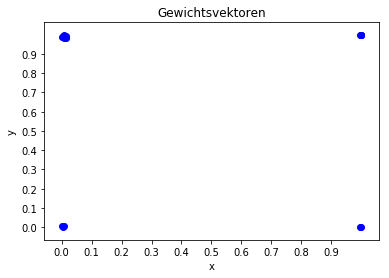

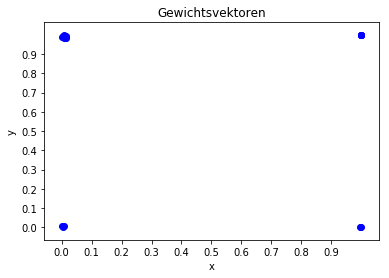

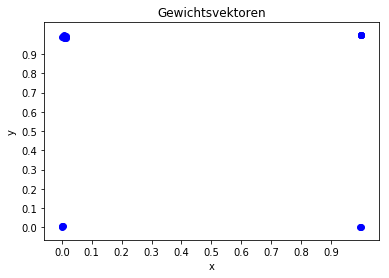

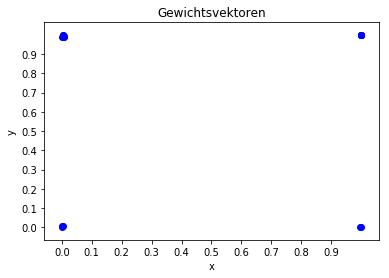

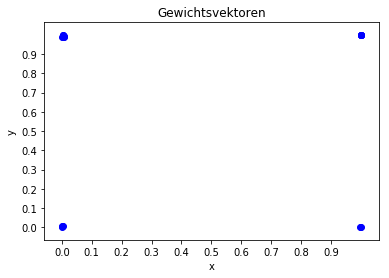

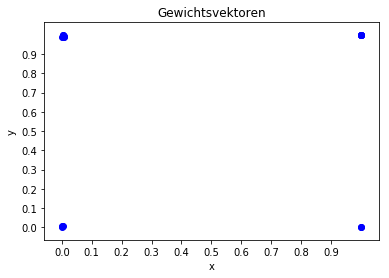

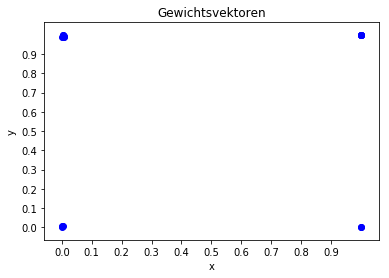

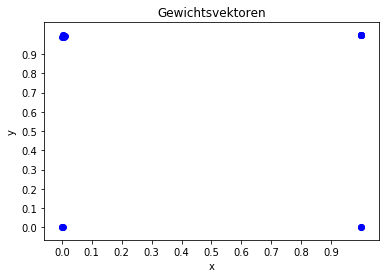

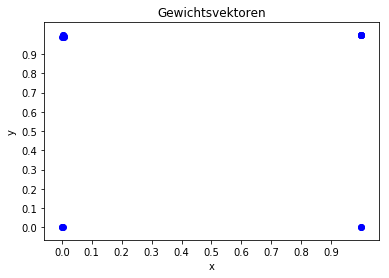

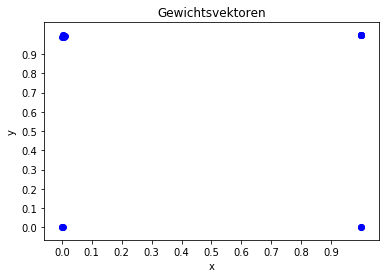

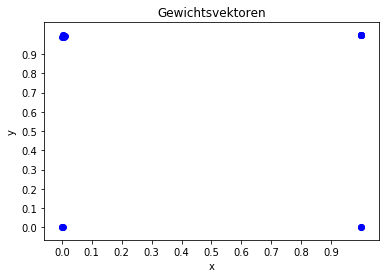

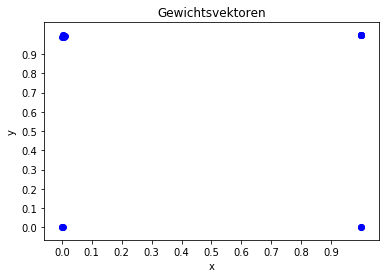

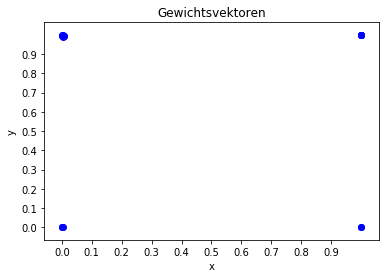

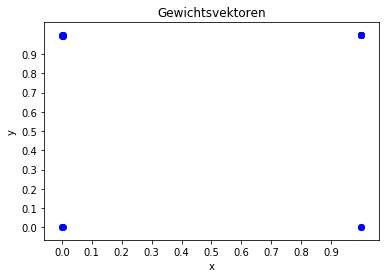

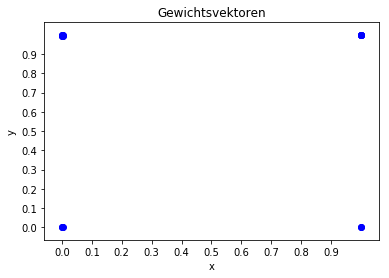

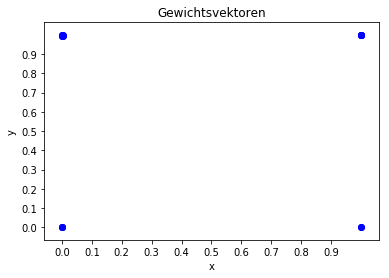

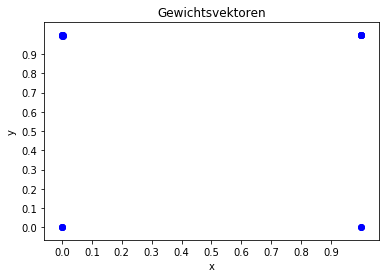

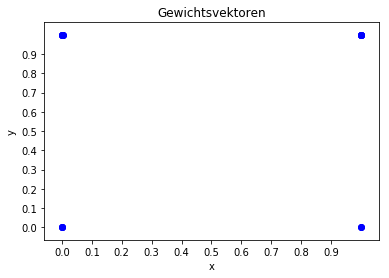

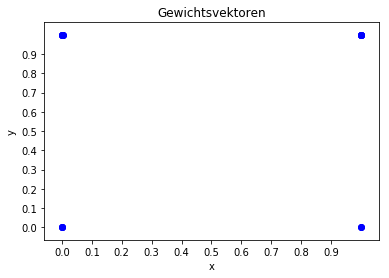

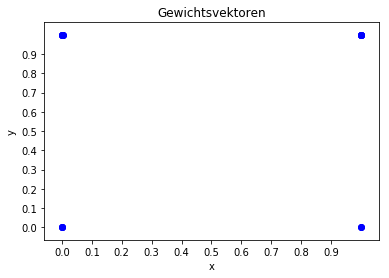

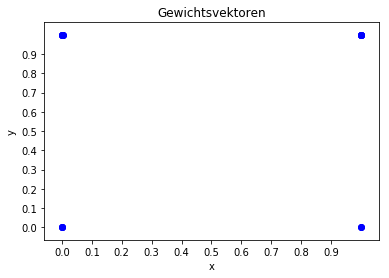

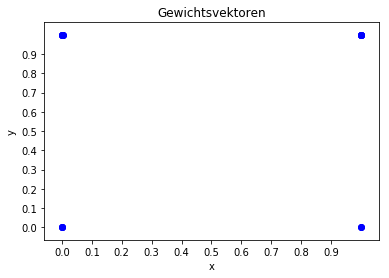

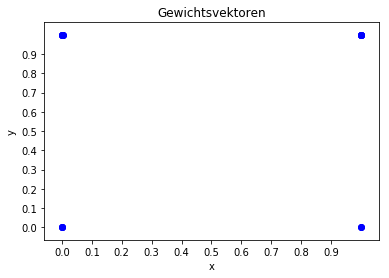

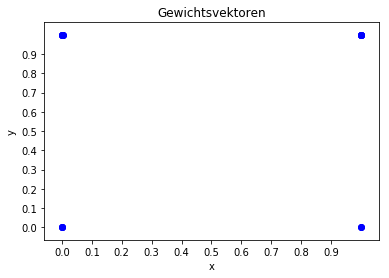

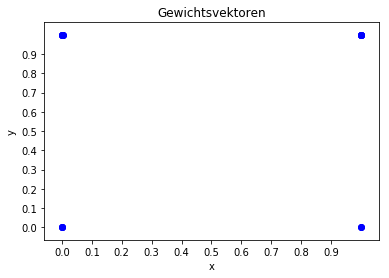

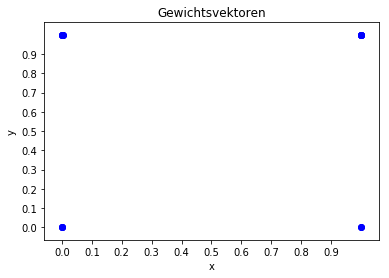

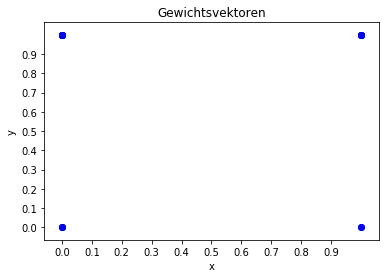

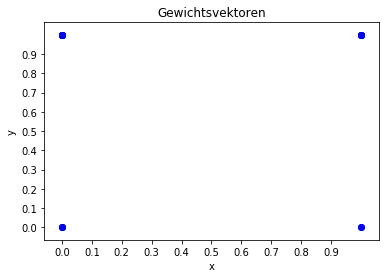

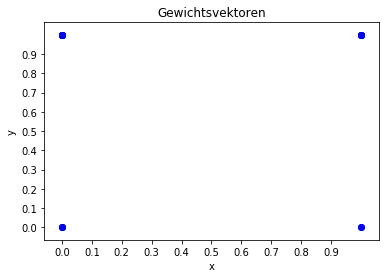

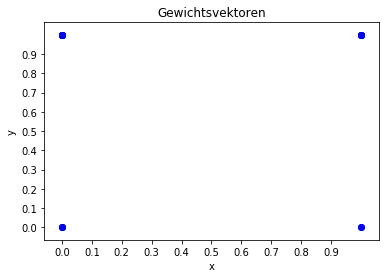

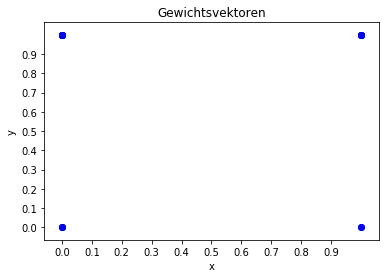

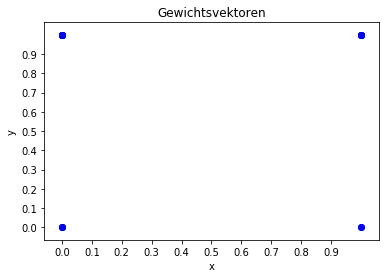

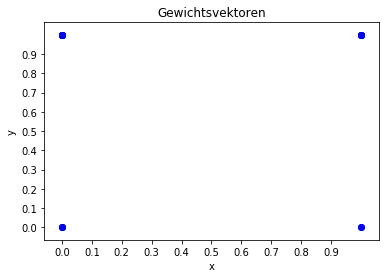

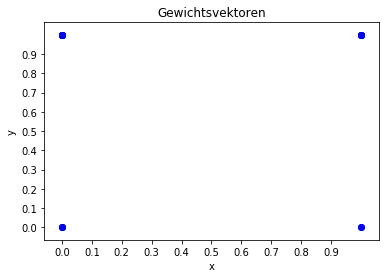

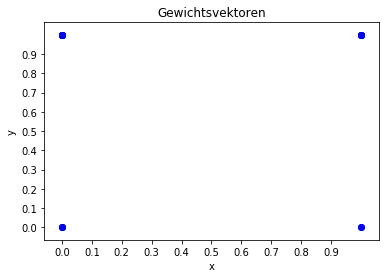

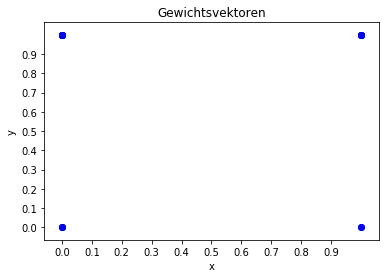

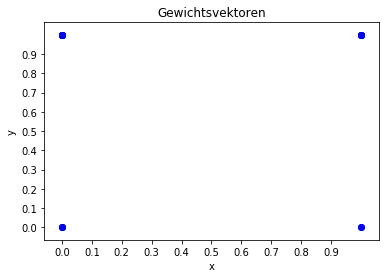

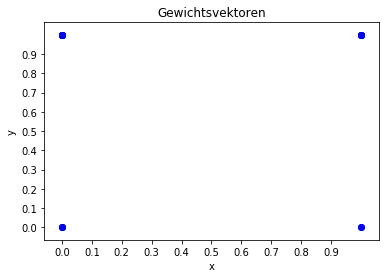

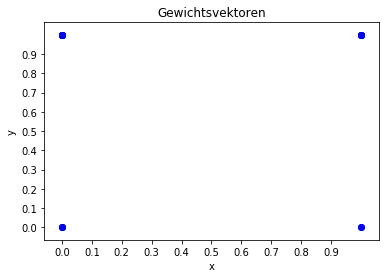

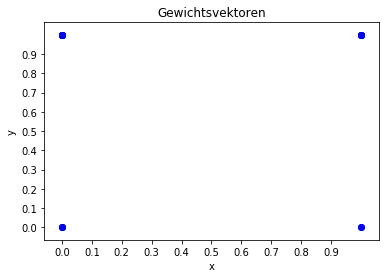

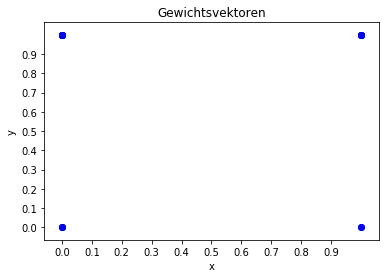

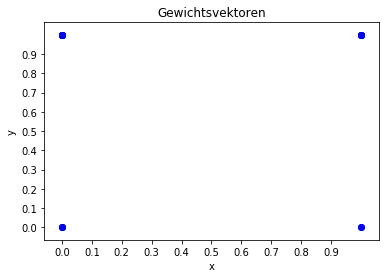

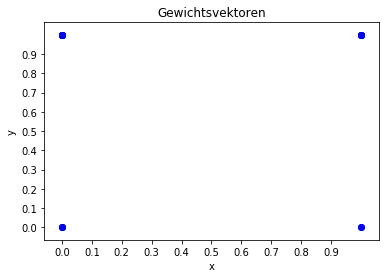

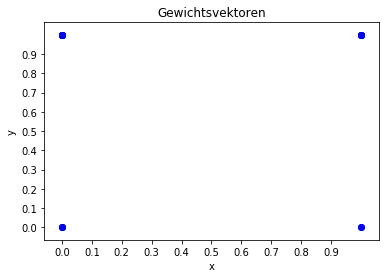

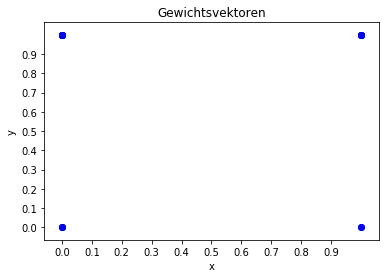

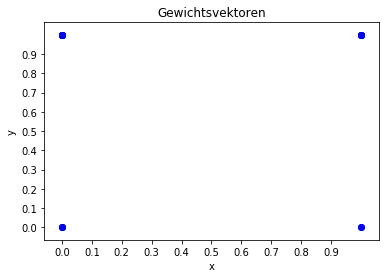

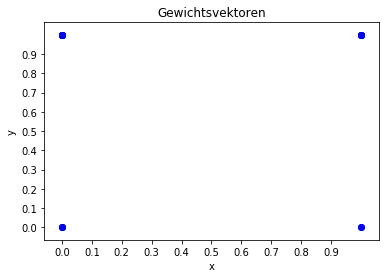

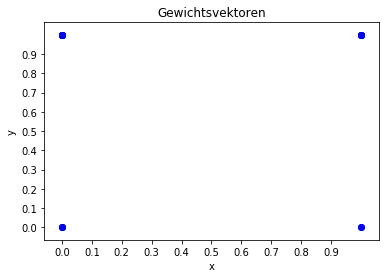

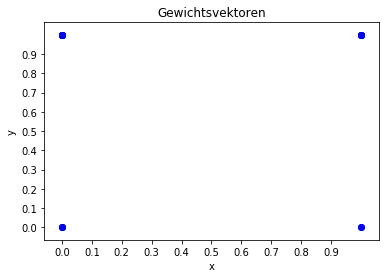

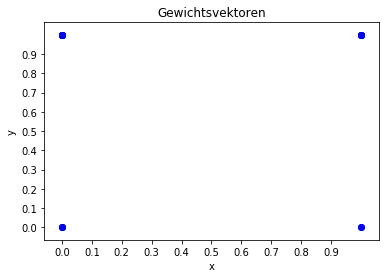

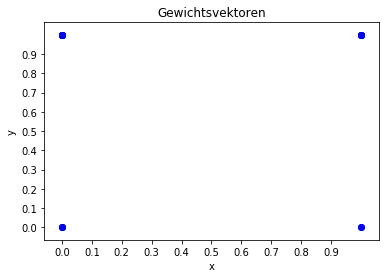

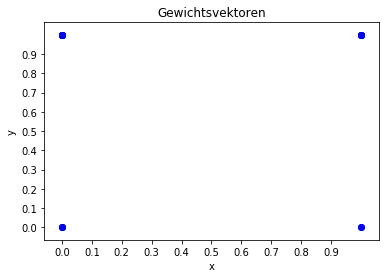

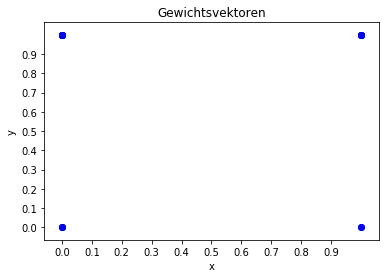

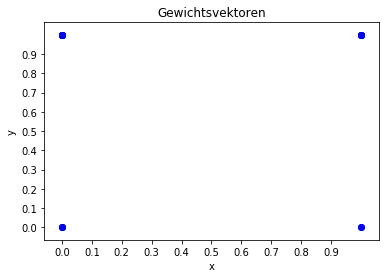

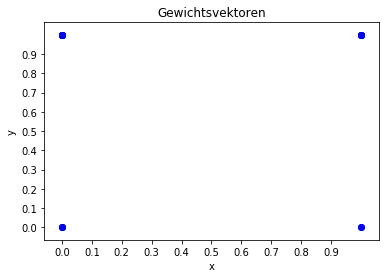

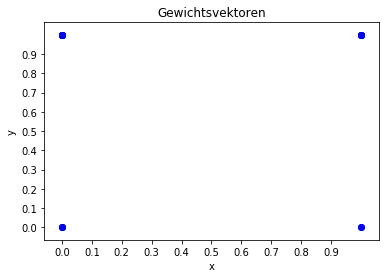

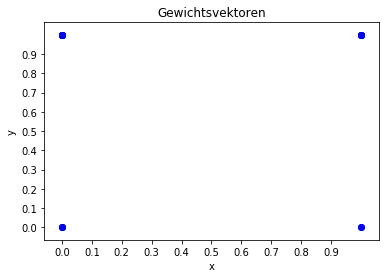

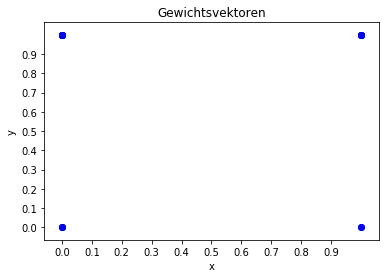

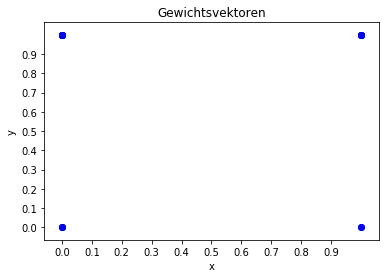

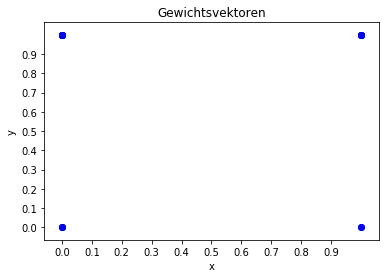

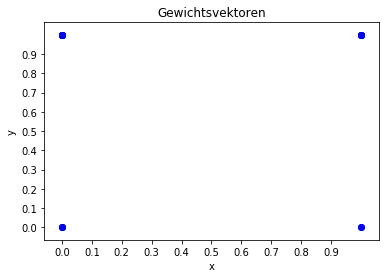

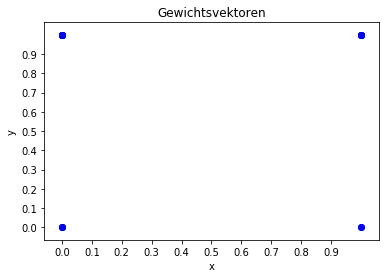

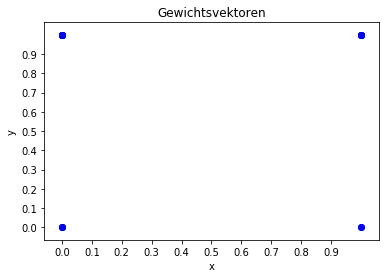

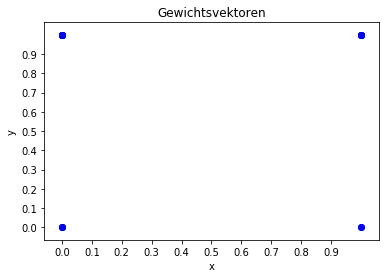

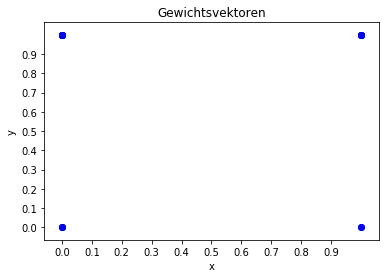

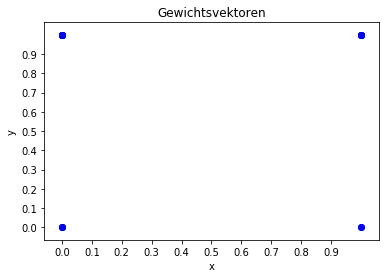

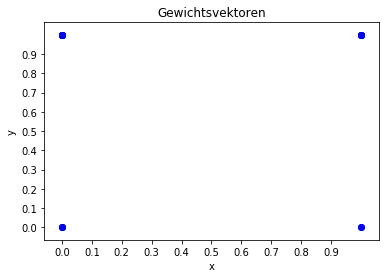

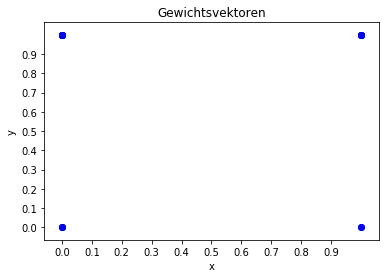

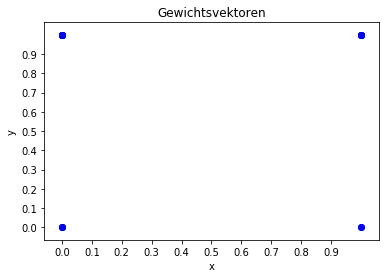

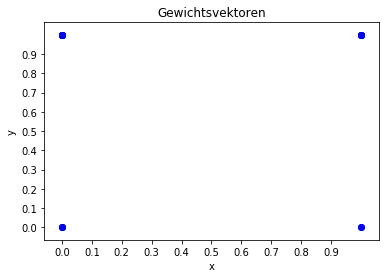

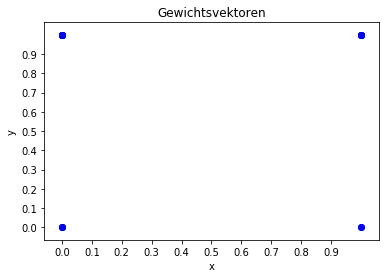

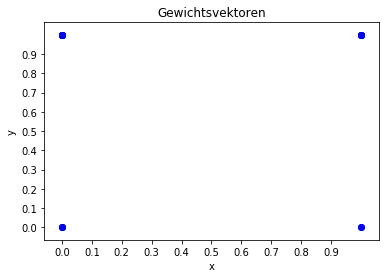

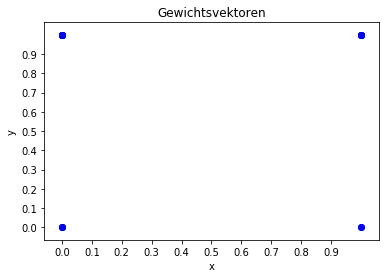

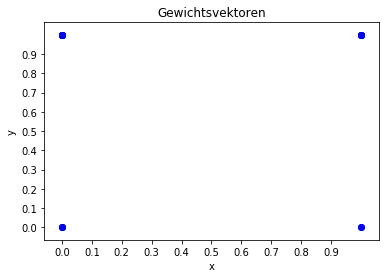

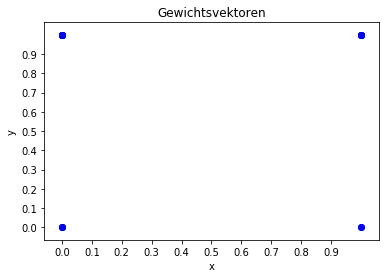

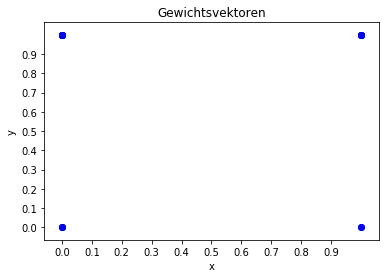

Aussagen zur XOR Funktion
Aussage 0 0, [  3.04732455e-04   9.20353095e-05]
Aussage 1 0, [  9.99871476e-01   3.98848004e-05]
Aussage 0 1, [  3.19301379e-04   9.99637444e-01]
Aussage 1 1, [ 0.99993518  0.99996069]


In [43]:
# Teuvo Kohonens SOM 

import random
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

# Leichter overkill, da nur Gewichte, aber ausbaufähig
class Node(object):
    def __init__(self, input_size=2):
        self.input_size = input_size   
        self.weight = np.array([random.random() \
                                for e in range(self.input_size)]) 
# Das ist das SOM        
class SOM(object):
    def __init__(self, map_width=10, map_height=10, alpha=0.005):
        """Initialisierung des SOM
        """
        self.map_width = map_width
        self.map_height = map_height
        self.radius = 0.6 # Radius
        self.alpha = alpha # Lernrate
        self.map = [[Node() for j in range(self.map_width)] \
                    for i in range(self.map_height)] # Die Map mit den Knoten
    
    def fit(self, iterations, X):
        """ Competitive Learning für das SOM
        """
        for s in range(1,iterations+1):
            radius_s = self.radius * math.exp(-1.0*s/iterations)
            # Alpha: V1
            # alpha_s = self.alpha / s
            # Alpha: V2
            alpha_s = self.alpha*(1.0 - s/iterations)           
            # Zufälligen Inputvektor auswählen
            x = X[random.randint(0,X.shape[0]-1)]
            distances = np.empty((self.map_width, self.map_height))
            # Alle Distanzen berechnen
            for i in range(self.map_width):
                for j in range(self.map_height):
                    distances[i][j] = self.distance(x,self.map[i][j].weight)
            # Best Matching Unit Index finden
            bmu_index = np.unravel_index(np.argmin(distances, axis=None),\
                        distances.shape)
            for i in range(self.map_width):
                for j in range(self.map_height):
                    v=self.map[i][j].weight # Gewichtsvektor eines Knoten
                    u=self.map[bmu_index[0]][bmu_index[1]].weight # BMU
                    distance=self.distance(u,v) # Distanz BMU und Gewichsvektor
                    if distance <= radius_s:
                        neighborhood = alpha_s # Nachbarschaftswert
                        self.map[i][j].weight += \
                          neighborhood * alpha_s * (x - v) # Gewichtsanpassung 
            # Weight Vektoren zeichnen in 2-dim plot
            self.plot_weights(x)
                    
    # Welcher Vektor ist am nächsten?
    def predict(self, y):
        distances = np.empty((self.map_width, self.map_height))
        # Alle Distanzen berechnen
        for i in range(self.map_width):
            for j in range(self.map_height):
                distances[i][j] = self.distance(y,self.map[i][j].weight)
        # Knoten mit kleinstem Abstand zwischen Gewichtsvektor und Target y
        min_dist_index = np.unravel_index(np.argmin(distances, axis=None),\
                         distances.shape)
        # Rückgabe des Gewichtsvektors
        return self.map[min_dist_index[0]][min_dist_index[1]].weight
    
    # Distanz zwischen zwei Vektoren, Berechnung optimiert
    def distance(self, u, v):
        return np.linalg.norm(u-v) 
    
    # Gewichte als Plot ausgeben
    def plot_weights(self,x):
        # Für Ausgabe
        fig, ax = plt.subplots()        
        weights_x = [] # x-Koordinaten
        weights_y = [] # y-Koordinaten
        # Alle Gewichte
        for i in range(self.map_width):
            for j in range(self.map_height):
                weights_x.append(self.map[i][j].weight[0])
                weights_y.append(self.map[i][j].weight[1])
        ax.scatter(weights_x, weights_y, color='b')       
        plt.title('Gewichtsvektoren')
        plt.xlabel('x')
        plt.ylabel('y') 
        xticks=np.arange(0,1,0.1)
        yticks=np.arange(0,1,0.1)
        plt.yticks(yticks)
        plt.xticks(xticks)
        plt.show()   
########### Let the SOM begin #################
###############################################
# Steuerung des SOM Trainings und der Auswertung
# Breite, Höhe der Map
map_width = 4 
map_height = 4 
# Lernrate
alpha = 0.8 
# Iterationen
iterations = 100 
# Zufalls
random.seed(1)
# Das SOM instanziieren
som=SOM(map_width,map_height,alpha)
# Training
print("Trainieren die XOR Funktion")
som.fit(iterations,X)
# Auswertung
print("Aussagen zur XOR Funktion")
print("Aussage 0 0, {}".format(som.predict([0,0])))
print("Aussage 1 0, {}".format(som.predict([1,0])))
print("Aussage 0 1, {}".format(som.predict([0,1])))
print("Aussage 1 1, {}".format(som.predict([1,1])))


    

## SOM - Ausführliche Variante

(0.0,0.0)
(0.0,0.25)
(0.0,0.5)
(0.0,0.75)
(0.25,0.0)
(0.25,0.25)
(0.25,0.5)
(0.25,0.75)
(0.5,0.0)
(0.5,0.25)
(0.5,0.5)
(0.5,0.75)
(0.75,0.0)
(0.75,0.25)
(0.75,0.5)
(0.75,0.75)
Trainieren die XOR Funktion


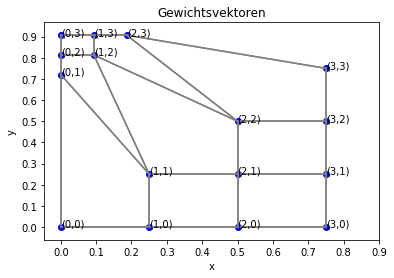

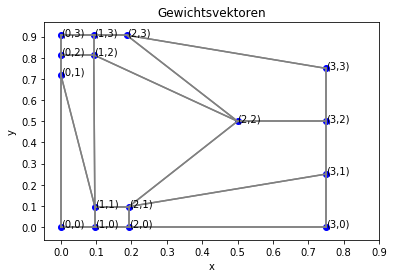

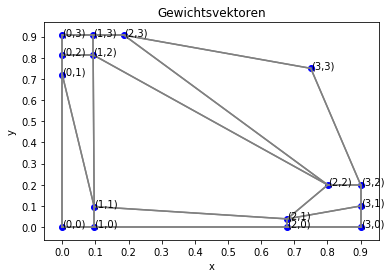

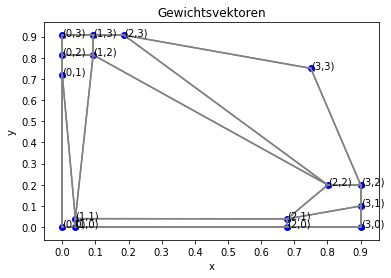

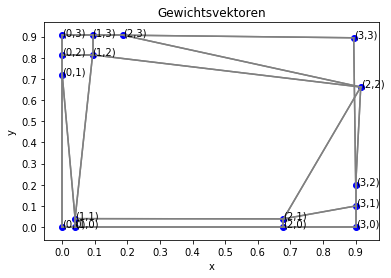

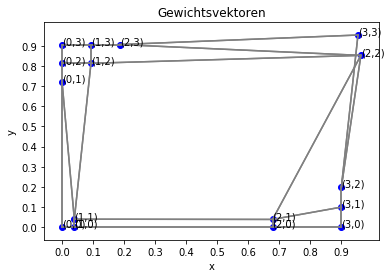

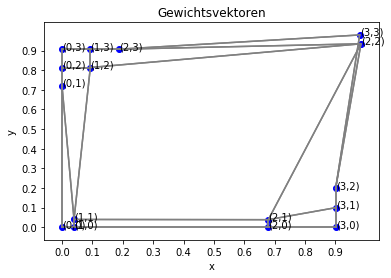

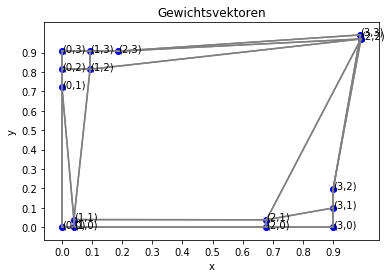

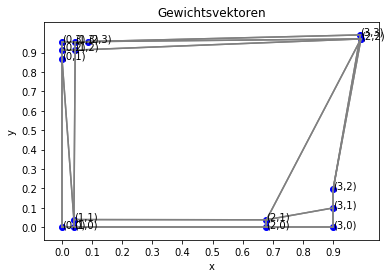

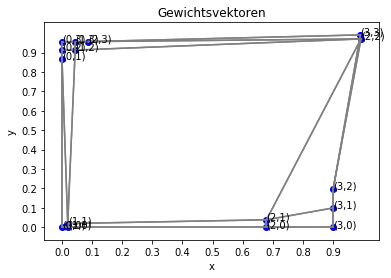

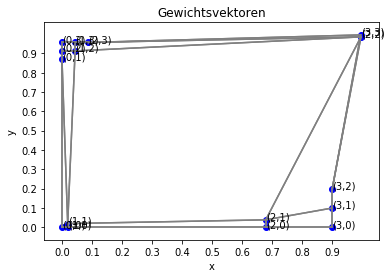

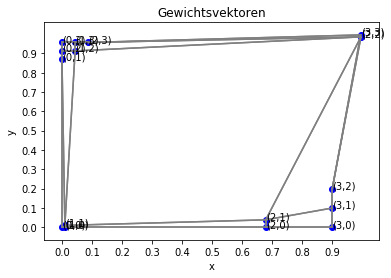

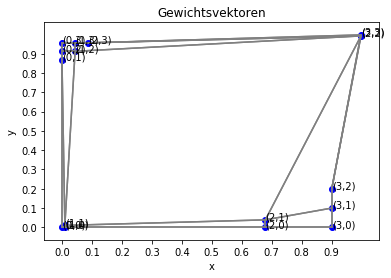

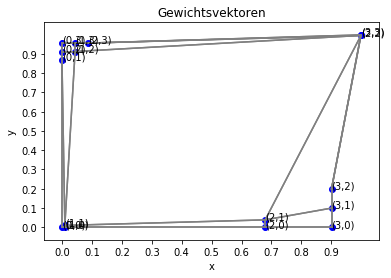

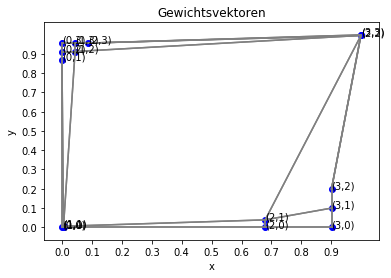

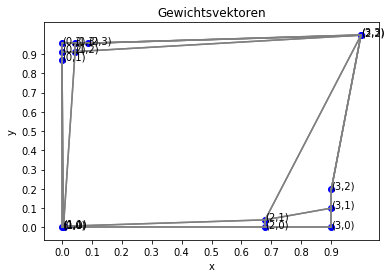

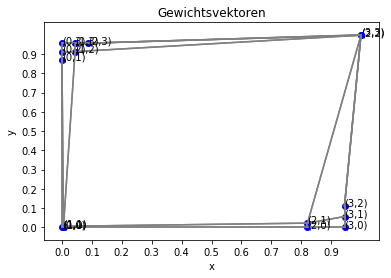

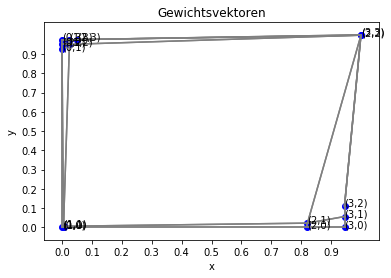

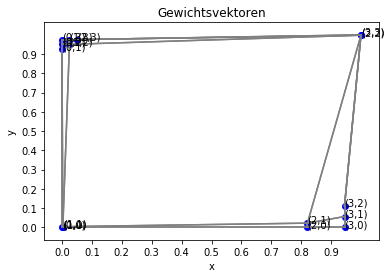

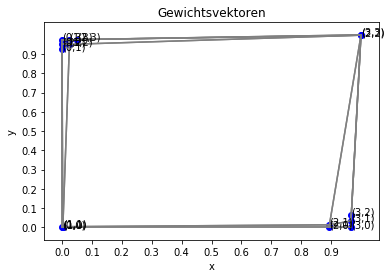

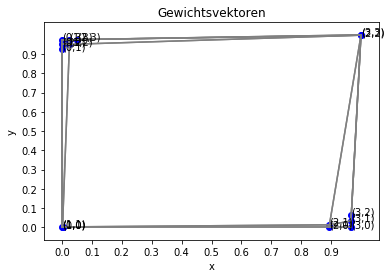

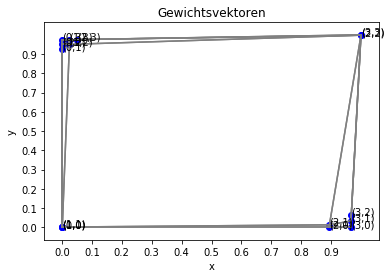

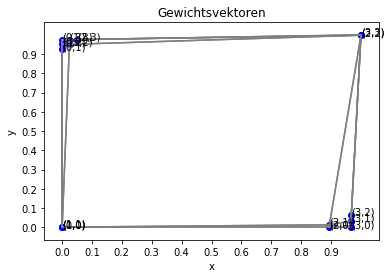

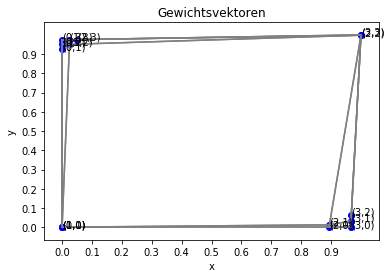

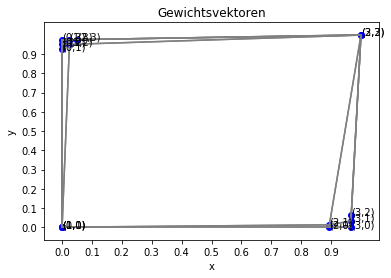

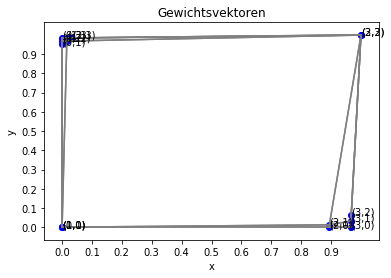

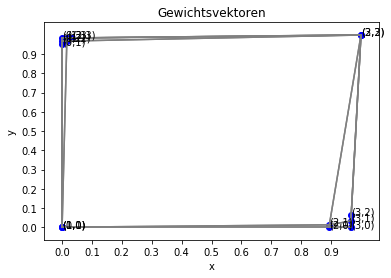

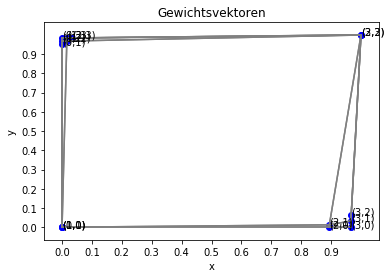

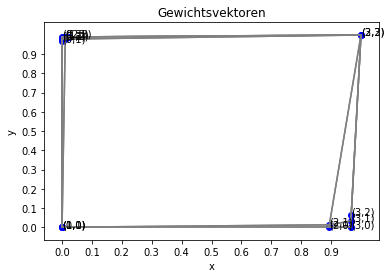

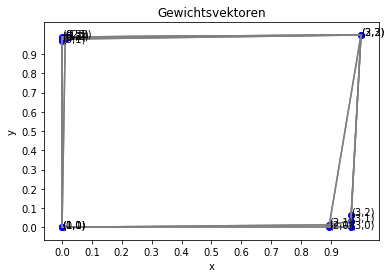

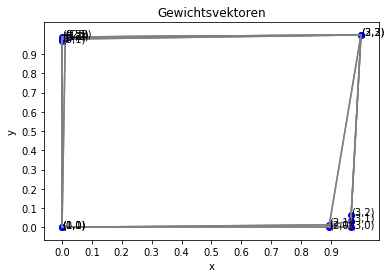

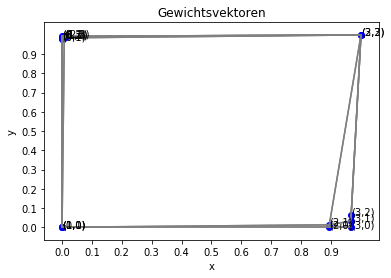

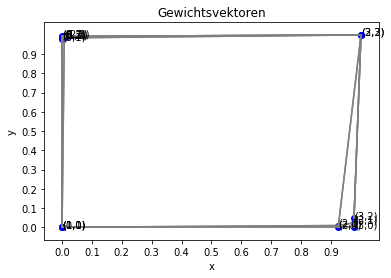

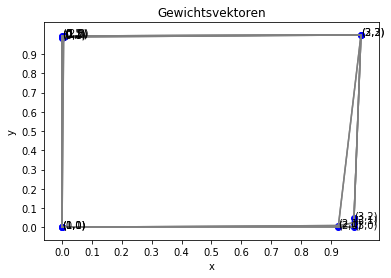

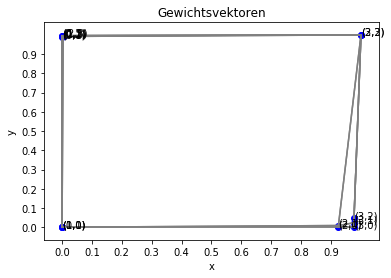

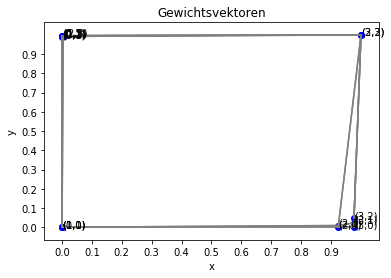

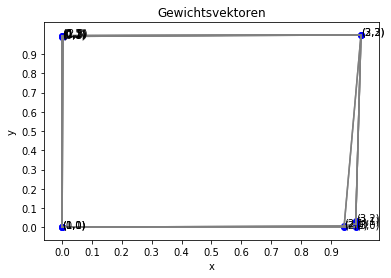

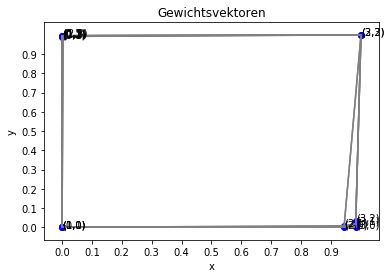

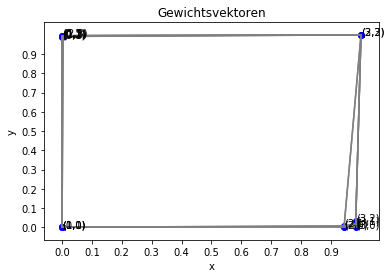

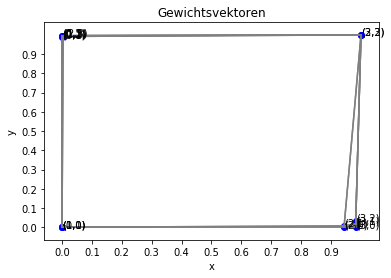

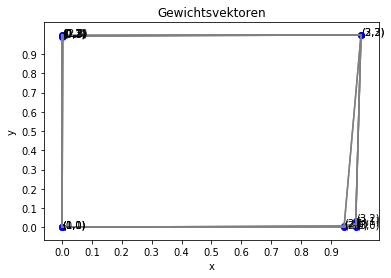

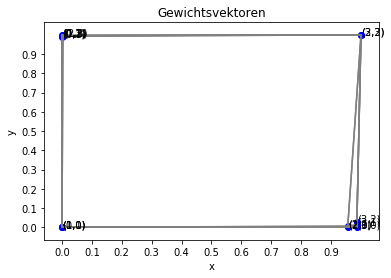

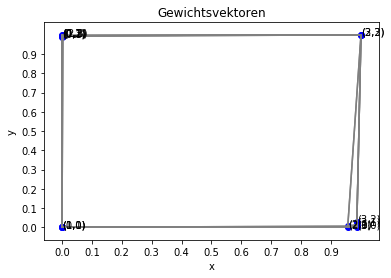

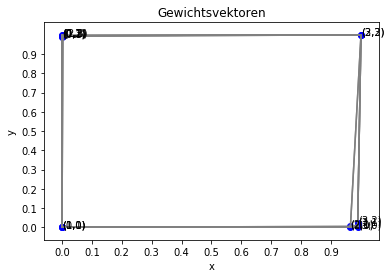

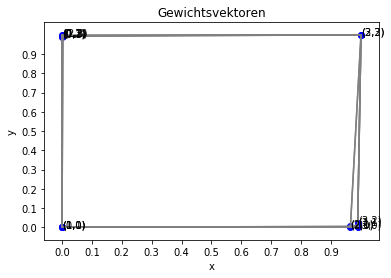

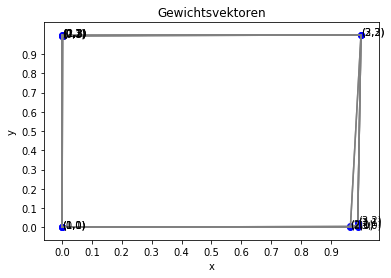

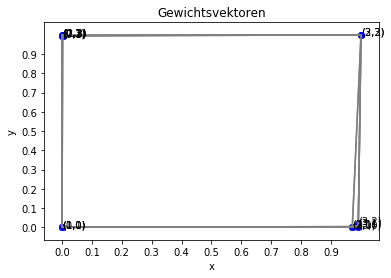

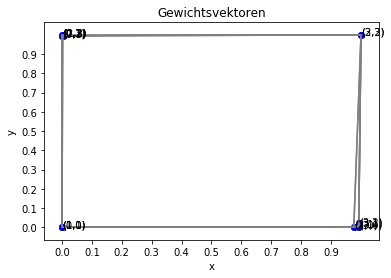

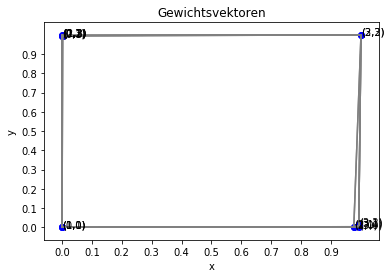

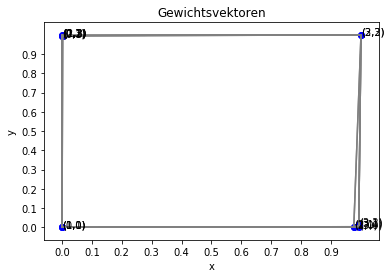

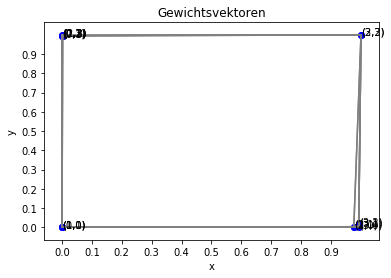

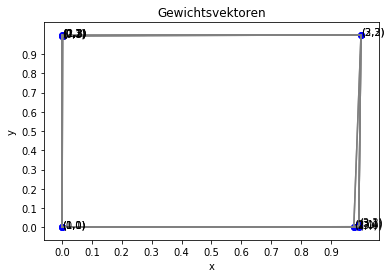

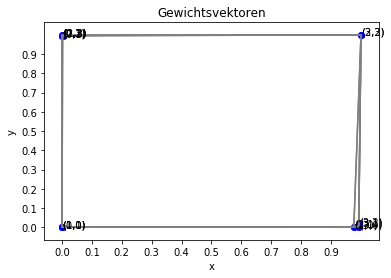

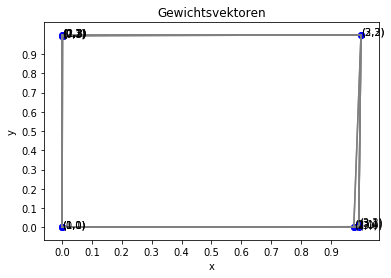

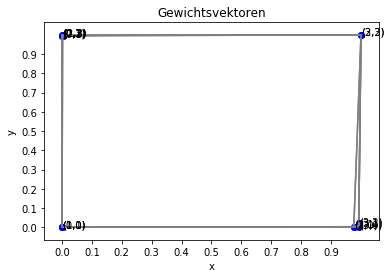

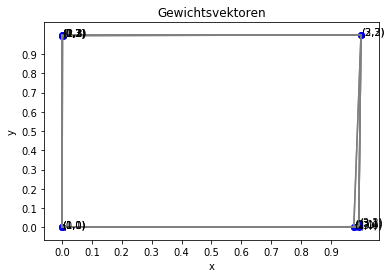

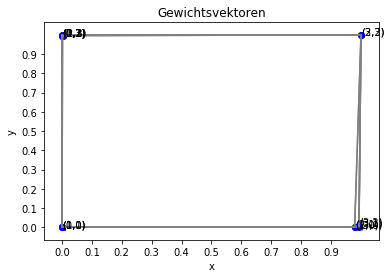

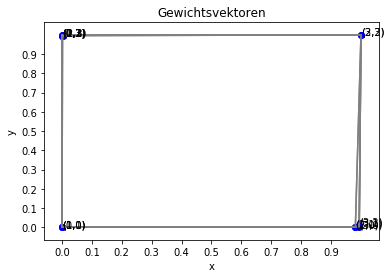

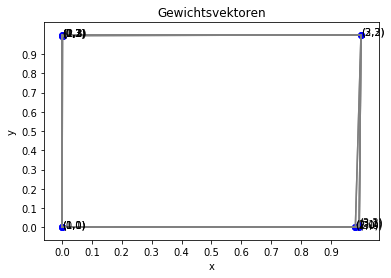

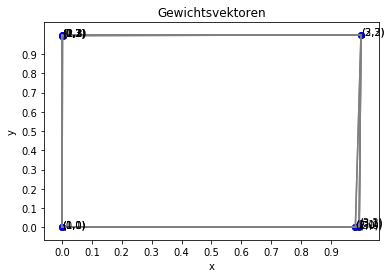

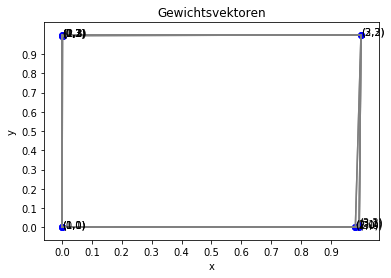

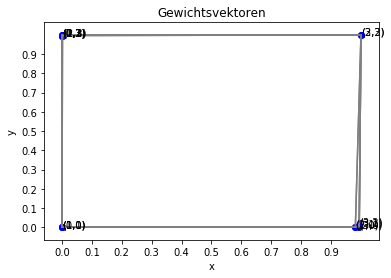

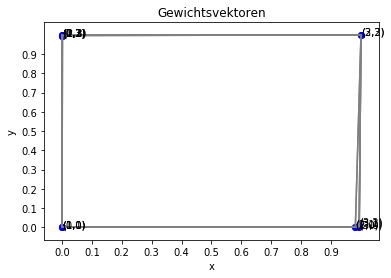

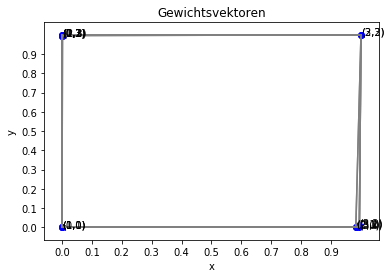

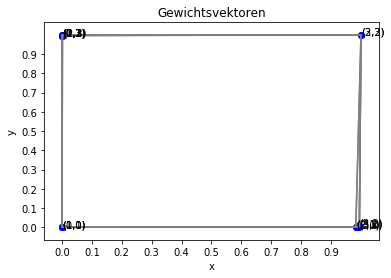

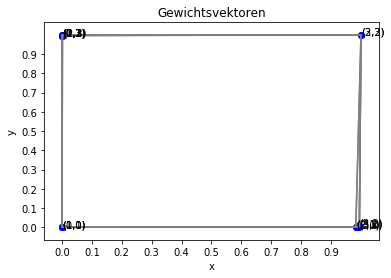

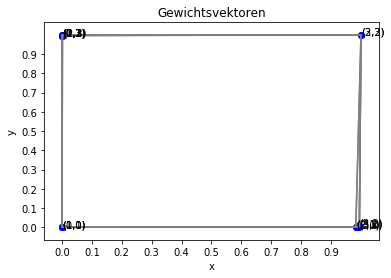

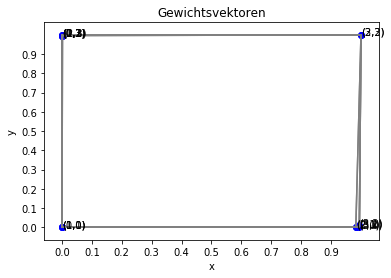

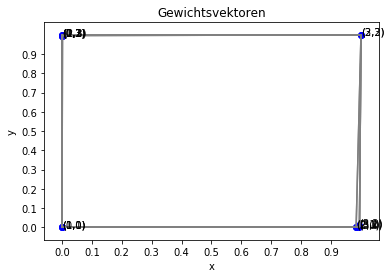

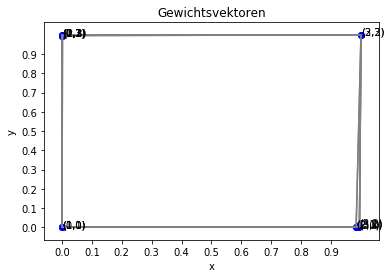

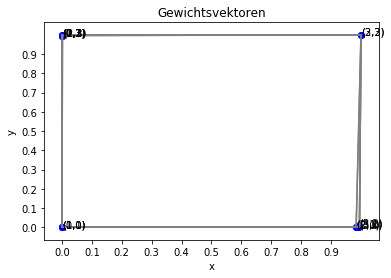

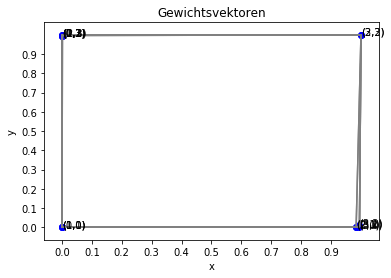

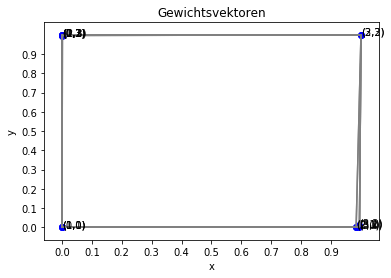

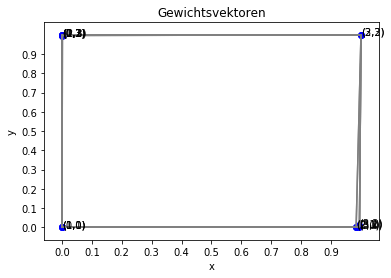

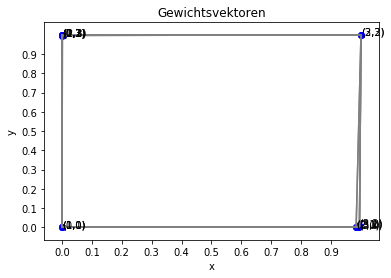

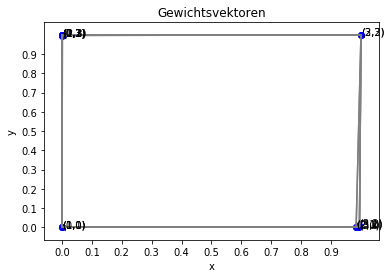

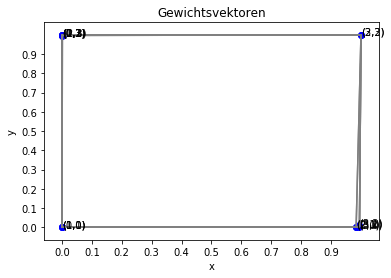

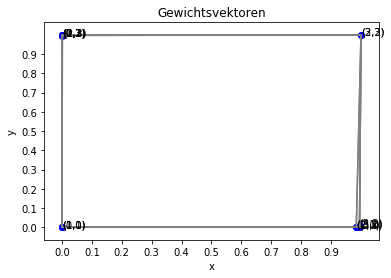

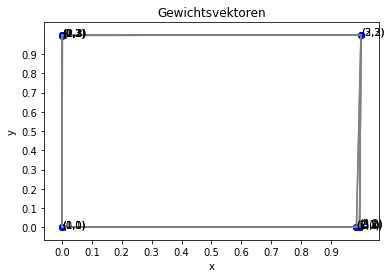

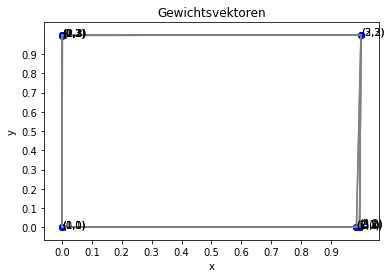

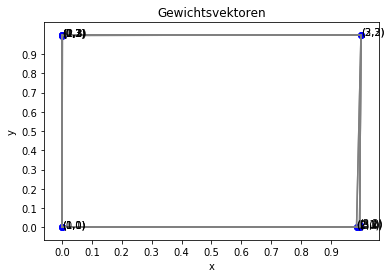

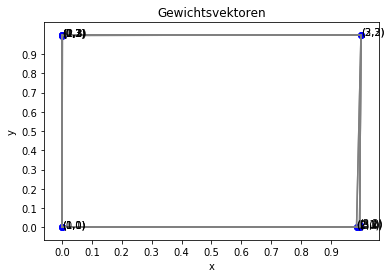

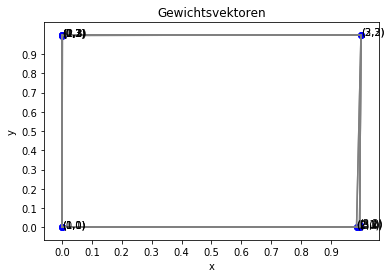

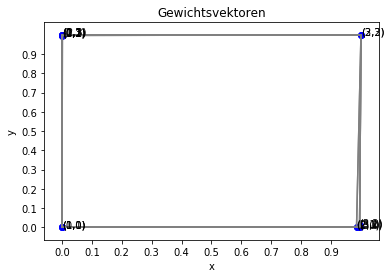

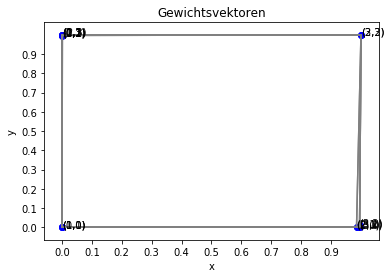

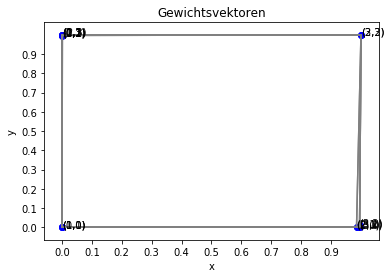

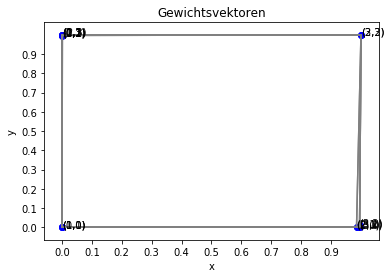

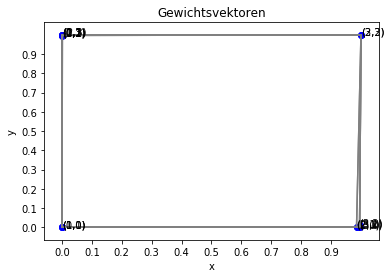

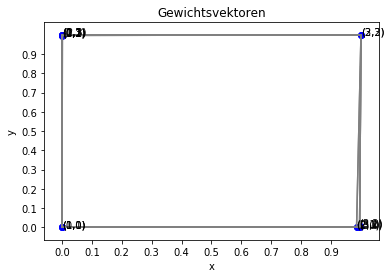

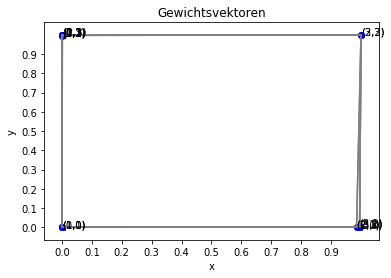

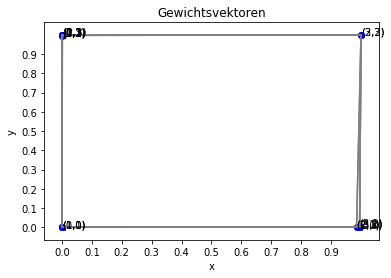

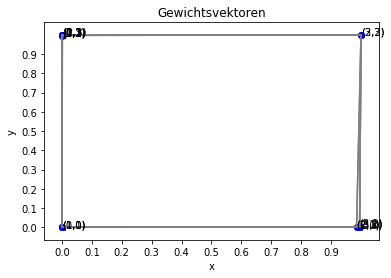

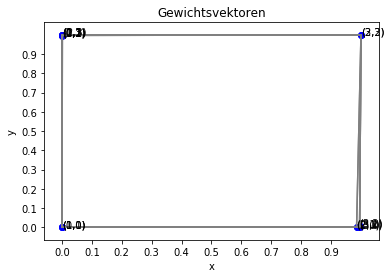

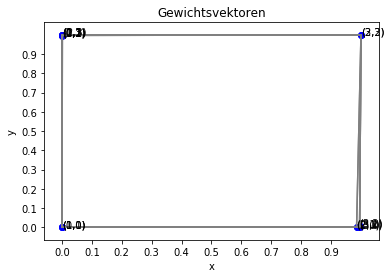

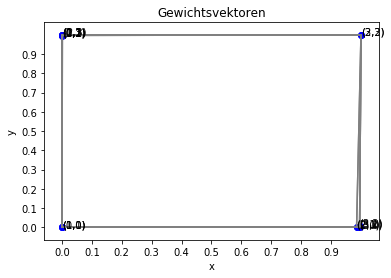

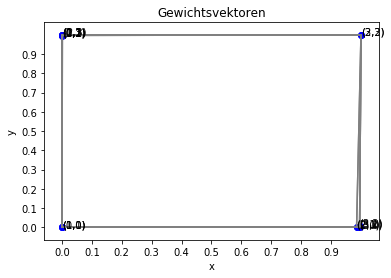

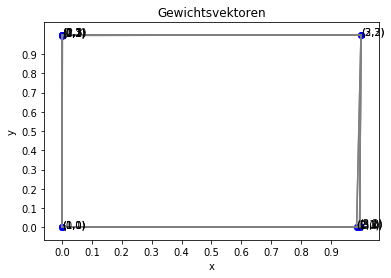

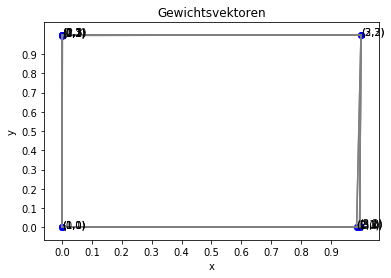

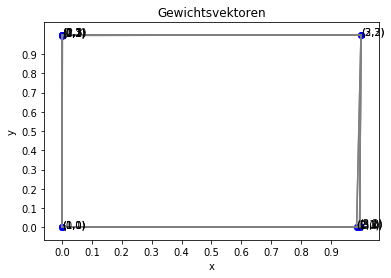

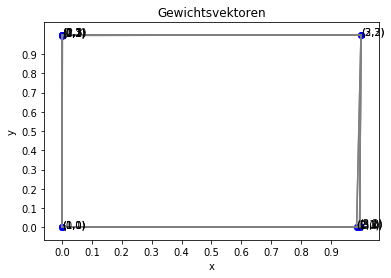

Aussagen zur XOR Funktion
Aussage 0 0, [ 0.  0.]
Aussage 1 0, [ 0.99546163  0.        ]
Aussage 0 1, [ 0.          0.99866062]
Aussage 1 1, [ 0.9999833  0.9999833]


In [41]:
# Teuvo Kohonens SOM 

import random
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

# Leichter overkill, da nur Gewichte, aber ausbaufähig
class Node(object):
    def __init__(self, input_size=2,w1=None,w2=None):
        self.input_size = input_size
        if w1 != None:
            print('(' + str(w1) + ',' + str(w2) +')')
            self.weight = np.array([w1,w2])
        else:    
            self.weight = np.array([random.random() \
                                for e in range(self.input_size)]) 
# Das ist das SOM        
class SOM(object):
    def __init__(self, map_width=10, map_height=10, alpha=0.005):
        """Initialisierung des SOM
        """
        self.map_width = map_width
        self.map_height = map_height
        self.radius = 0.6 # Radius
        self.alpha = alpha # Lernrate
        self.map = [[Node(w1=i/self.map_height, w2=j/self.map_width) for j in range(self.map_width)] \
                    for i in range(self.map_height)] # Die Map mit den Knoten
    
    def fit(self, iterations, X):
        """ Competitive Learning für das SOM
        """
        for s in range(1,iterations+1):
            radius_s = self.radius * math.exp(-1.0*s/iterations)
            # Alpha: V1
            # alpha_s = self.alpha / s
            # Alpha: V2
            alpha_s = self.alpha*(1.0 - s/iterations)           
            # Zufälligen Inputvektor auswählen
            x = X[random.randint(0,X.shape[0]-1)]
            distances = np.empty((self.map_width, self.map_height))
            # Alle Distanzen berechnen
            for i in range(self.map_width):
                for j in range(self.map_height):
                    distances[i][j] = self.distance(x,self.map[i][j].weight)
            # Best Matching Unit Index finden
            bmu_index = np.unravel_index(np.argmin(distances, axis=None),\
                        distances.shape)
            for i in range(self.map_width):
                for j in range(self.map_height):
                    v=self.map[i][j].weight # Gewichtsvektor eines Knoten
                    u=self.map[bmu_index[0]][bmu_index[1]].weight # BMU
                    distance=self.distance(u,v) # Distanz BMU und Gewichsvektor
                    if distance <= radius_s:
                        neighborhood = alpha_s # Nachbarschaftswert
                        self.map[i][j].weight += \
                          neighborhood * alpha_s * (x - v) # Gewichtsanpassung 
            # Weight Vektoren zeichnen in 2-dim plot
            self.plot_weights(x)
                    
    # Welcher Vektor ist am nächsten?
    def predict(self, y):
        distances = np.empty((self.map_width, self.map_height))
        # Alle Distanzen berechnen
        for i in range(self.map_width):
            for j in range(self.map_height):
                distances[i][j] = self.distance(y,self.map[i][j].weight)
        # Knoten mit kleinstem Abstand zwischen Gewichtsvektor und Target y
        min_dist_index = np.unravel_index(np.argmin(distances, axis=None),\
                         distances.shape)
        # Rückgabe des Gewichtsvektors
        return self.map[min_dist_index[0]][min_dist_index[1]].weight
    
    # Distanz zwischen zwei Vektoren, Berechnung optimiert
    def distance(self, u, v):
        return np.linalg.norm(u-v) 
    
    # Gewichte als Plot ausgeben
    def plot_weights(self,x):
        # Vorberetigung annotation
        fig, ax = plt.subplots()
        
        weights_x = [] # x-Koordinaten
        weights_y = [] # y-Koordinaten
        # Alle Gewichte
        for i in range(self.map_width):
            for j in range(self.map_height):
                weights_x.append(self.map[i][j].weight[0])
                weights_y.append(self.map[i][j].weight[1])
        ax.scatter(weights_x, weights_y, color='b')
        # Mesh
        self.plot_mesh(ax)
                
        plt.title('Gewichtsvektoren')
        plt.xlabel('x')
        plt.ylabel('y') 
        xticks=np.arange(0,1,0.1)
        yticks=np.arange(0,1,0.1)
        plt.yticks(yticks)
        plt.xticks(xticks)
        plt.show()   
    # Ausgabe des Mesh
    def plot_mesh(self,ax):
        #ax.plot(weights_x, weights_y)
        # Annotation
        for i in range(self.map_width):
            for j in range(self.map_height):
                ax.annotate('(' + str(i) + ',' + str(j) +')', (self.map[i][j].weight[0], self.map[i][j].weight[1]))
        # Mesh
        # Die Punkte sind wie ein Kreuz verbunden, daher prüfen wir die Nachbarn
        # Wir beginnen damit rechts vom Punkt und drehen uns im Uhrzeigersinn
        for i in range(self.map_width):
            for j in range(self.map_height):
                x0 = self.map[i][j].weight[0]
                y0 = self.map[i][j].weight[1]
                iminus1 = i-1
                iplus1 = i+1
                jminus1 = j-1
                jplus1 = j+1
                # Right
                if iplus1 < self.map_width:
                    self.plot_mesh_line(ax,i,j,iplus1,j)
                # Down    
                if jplus1 < self.map_height:
                    self.plot_mesh_line(ax,i,j,i,jplus1)
                # Left    
                if iminus1 >= 0:
                    self.plot_mesh_line(ax,i,j,iminus1,j)
                # Top
                if jminus1 >= 0:
                    self.plot_mesh_line(ax,i,j,i,jminus1)
    # Ausgabe des Mesh Linie
    def plot_mesh_line(self,ax,i0,j0,i1,j1):
                    x = []
                    y = []
                    x0 = self.map[i0][j0].weight[0]
                    y0 = self.map[i0][j0].weight[1]
                    x1 = self.map[i1][j1].weight[0]
                    y1 = self.map[i1][j1].weight[1]
                    x.append(x0) 
                    x.append(x1) 
                    y.append(y0)
                    y.append(y1)
                    ax.plot(x,y, color="grey" )          
                    #print('Draw: ({},{})->({},{})'.format(i,j,i0,j0))        
###############################################
########### Let the SOM begin #################
###############################################
# Steuerung des SOM Trainings und der Auswertung
# Breite, Höhe der Map
map_width = 4 
map_height = 4 
# Lernrate
alpha = 0.8 
# Iterationen
iterations = 100 
# Zufalls
random.seed(1)
# Das SOM instanziieren
som=SOM(map_width,map_height,alpha)
# Training
print("Trainieren die XOR Funktion")
som.fit(iterations,X)
# Auswertung
print("Aussagen zur XOR Funktion")
print("Aussage 0 0, {}".format(som.predict([0,0])))
print("Aussage 1 0, {}".format(som.predict([1,0])))
print("Aussage 0 1, {}".format(som.predict([0,1])))
print("Aussage 1 1, {}".format(som.predict([1,1])))


    

## Q-learning

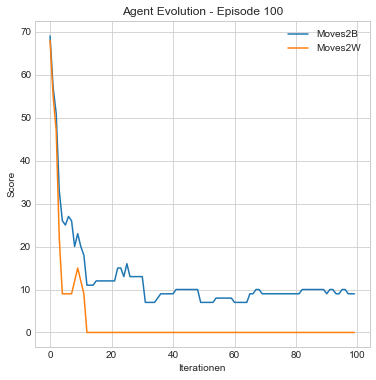

In [53]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import random 
import copy
import numpy as np
# Ganz wichtig, sonst wird der Plot nicht angezeigt
%matplotlib inline


############################################################## 
class Const(object):
    LINKS = 'links'
    RECHTS = 'rechts'
    OBEN = 'oben'
    UNTEN = 'unten'
    WAND = '#'
    BESUCHT = '+'
    UNBESUCHT = '-'
    AGENT = 'o'

class Umgebung(object):
    def __init__(self,width,height):
        self.width = width
        self.height = height
        self._agent = None
        self.R = {}
        self.environment = {}
        self.scene = {}
        self.init_environment()
        self.init_R()

    def init_environment(self):
        for y in range(self.height):
            for x in range(self.width):
                if (y == 0) or (y == self.height - 1):
                        self.environment[x,y] = Const.WAND
                else:
                    if (x == 0) or (x == self.width - 1):
                        self.environment[x,y] = Const.WAND
                    else:
                        self.environment[x,y] = Const.UNBESUCHT       
        
    def change_environment(self,x,y,value):
        self.environment[x,y] = value
      
    def print_scene(self):
        #self.prepare_scene()
        for y in range(self.height):
            for x in range(self.width):
                scene_element = self.environment[x,y]
                if self._agent != None and x == self._agent.posx and y == self._agent.posy:
                    scene_element = Const.AGENT
                    
                if x <= self.width - 2:
                    print(scene_element, sep='', end='', flush=False)
                else:
                    print(scene_element)
                    
    def init_R(self):
        R_right = R_down = R_left = R_up = 0.0
        for _, right in enumerate([Const.WAND,Const.BESUCHT,Const.UNBESUCHT]):
            for _, down in enumerate([Const.WAND,Const.BESUCHT,Const.UNBESUCHT]):
                for _, left in enumerate([Const.WAND,Const.BESUCHT,Const.UNBESUCHT]):
                    for _, up in enumerate([Const.WAND,Const.BESUCHT,Const.UNBESUCHT]):
                        R_right = self.R_val(right)
                        R_down = self.R_val(down)
                        R_left = self.R_val(left)
                        R_up = self.R_val(up)
                        #Dictionary für die Werte, um einfach darauf zuzugreifen
                        R_val = {Const.RECHTS:R_right,Const.UNTEN:R_down,Const.LINKS:R_left,Const.OBEN:R_up}    
                        self.R[right,down,left,up] = R_val

    def R_val(self,cell_val):
        if cell_val == Const.WAND:
            return -10.0 
        elif cell_val == Const.UNBESUCHT:
            return +5.0 
        elif cell_val == Const.BESUCHT:
            return -3.0
        else: 
            return 0.0 
        
    def print_R(self):
        for R_key, R_val in self.R.items():
            print("{} {}".format(R_key,R_val))
            
    def all_visited(self):
        for y in range(self.height):
            for x in range(self.width):
                if self.environment[x,y] == Const.UNBESUCHT:
                    return False
        return True
               
    @property
    def agent(self): 
        return self._agent
    
    @agent.setter
    def agent(self, value): 
        self._agent = value
    #
    @agent.deleter
    def agent(self): 
        del self._agent
##############################################################                        
class Agent(object):
    def __init__(self,posx,posy,umgebung,gamma=0.8,alpha=1.0,epsilon=0.2):
        self.init_agent(posx,posy,gamma,alpha,epsilon)
        self.umgebung = umgebung
        self.sensor_werte = {}
        self.reaktion = {} #Code und Text, Code = 0=OK/1=Wand/2=Kollege
        self.Q = {}
        self.init_Q()

    def init_agent(self,posx=-1,posy=-1,gamma=0.8,alpha=1.0,epsilon=0.2):
        self.moves = 0     # Wie oft habe ich mich bewegt, der erste Move ist das Platzieren beim Start
        self.moves_2_u = 1 # Wie viele unbesuchte habe ich besucht, der erste ist immer unbesucht
        self.moves_2_b = 0
        self.moves_2_w = 0
        self.score = 0
        self.gamma = gamma
        self.alpha = alpha # Lernrate
        self.epsilon = epsilon # Grenze für zufällige Selektion der Aktion
        if posx == -1 and posy == -1:
            self.random_pos()
        else:
            self.set_pos(posx,posy)
        
    def random_pos(self):
        self.posx = random.randint(1,self.umgebung.width-2)
        self.posy = random.randint(1,self.umgebung.height-2)
        
    def set_pos(self,posx,posy):
        self.posx = posx
        self.posy = posy
        
    def init_Q(self):
        for _, right in enumerate([Const.WAND,Const.BESUCHT,Const.UNBESUCHT]):
            for _, down in enumerate([Const.WAND,Const.BESUCHT,Const.UNBESUCHT]):
                for _, left in enumerate([Const.WAND,Const.BESUCHT,Const.UNBESUCHT]):
                    for _, up in enumerate([Const.WAND,Const.BESUCHT,Const.UNBESUCHT]):
                        q_right = 0.1
                        q_down = 0.2
                        q_left = 0.3
                        q_up = 0.4
                        #Dictionary für die Werte, um einfach darauf zuzugreifen
                        q_val = {Const.RECHTS:q_right,Const.UNTEN:q_down,Const.LINKS:q_left,Const.OBEN:q_up}
                        self.Q[right,down,left,up] = q_val
                    
    def print_Q(self):
        for state, value in self.Q.items():
            print("{} {}".format(state,value))
                        
    def set_umgebung(self,umgebung):
        self.umgebung = umgebung
        
    def move_me(self,richtung):
        posx_neu = self.posx
        posy_neu = self.posy

        if richtung == Const.LINKS:
            posx_neu -= 1
        elif richtung == Const.RECHTS:
            posx_neu += 1
        elif richtung == Const.OBEN:
            posy_neu -= 1
        elif richtung == Const.UNTEN:
            posy_neu += 1

        # Wand oder Kollege
        if self.sensor_werte[richtung] != Const.WAND:            
            self.posx = posx_neu
            self.posy = posy_neu
            
    def move_me_q(self):
        self.moves += 1
        posx_neu = self.posx
        posy_neu = self.posy

        action = self.get_max_q_action()
        # print("action: {} {}".format(action, print_flag))

        if action == Const.LINKS:
            posx_neu -= 1
        elif action == Const.RECHTS:
            posx_neu += 1
        elif action == Const.OBEN:
            posy_neu -= 1
        elif action == Const.UNTEN:
            posy_neu += 1

        # Wand oder Kollege
        if self.sensor_werte[action] != Const.WAND:            
            self.posx = posx_neu
            self.posy = posy_neu  
        
        # Moves 2 Unbesucht
        if self.umgebung.environment[self.posx,self.posy] == Const.UNBESUCHT:
            self.moves_2_u += 1
        # Moves 2 Besucht
        if self.umgebung.environment[self.posx,self.posy] == Const.BESUCHT:
            self.moves_2_b += 1 
        # Moves 2 Wand
        if self.sensor_werte[action] == Const.WAND:
            self.moves_2_w += 1             
      
    def get_max_q_action_key(self,q_values):
        action_keys = []
    
        action = max(q_values, key=lambda k: q_values[k])
        for key, value in q_values.items():
            if value == q_values[action]:
                action_keys.append(key)
        #print("Action Keys: {}".format(action_keys))
        action = random.choice(action_keys)
        return action, action_keys
    
    def get_max_q_action(self):
        action_keys = []
        sensor = self.sensieren()
        state = (sensor[Const.RECHTS],sensor[Const.UNTEN],sensor[Const.LINKS],sensor[Const.OBEN])
        q_values = self.Q.get(state)
        #print("q_values: {}".format(q_values))
        action = max(q_values, key=lambda k: q_values[k])
        for key, value in q_values.items():
            if value == q_values[action]:
                action_keys.append(key)
        #print("Action Keys: {}".format(action_keys))
        action = random.choice(action_keys)
        return action
        
    def next_state(self,actual_state,action):
        posx_neu = self.posx
        posy_neu = self.posy

        if action == Const.LINKS:
            posx_neu -= 1
        elif action == Const.RECHTS:
            posx_neu += 1
        elif action == Const.OBEN:
            posy_neu -= 1
        elif action == Const.UNTEN:
            posy_neu += 1

        # Wand oder Kollege
        if self.sensor_werte[action] == Const.WAND:            
            return self.sensieren()
        else:
            return self.sensieren(posx_neu,posy_neu)       
        
    def action(self,print_flag=False,alpha=1.0):
        self.moves += 1
        status = ''
        self.alpha = alpha # Lernrate
         # Aktueller Zustand: Die Umgebunginformation einholen
        actual_posx = self.posx
        actual_posy = self.posy
        sensor = self.sensieren()
        actual_state = (sensor[Const.RECHTS],sensor[Const.UNTEN],sensor[Const.LINKS],sensor[Const.OBEN])
        # 3.2.1 Nächster Schritt - zufällig
        action, selection_style = self.choose_action(print_flag)
        # 3.2.2 Ermittelter nächster Zustand
        sensor = self.next_state(actual_state,action)
        next_state = (sensor[Const.RECHTS],sensor[Const.UNTEN],sensor[Const.LINKS],sensor[Const.OBEN])
        # 3.2.3 Ermittle den maximalen Q-Wert für alle möglichen Aktionen im nächsten Zustand
        next_q_values = self.Q.get(next_state).values() 
        max_q = max(self.Q.get(next_state).values())
        # 3.2.4 Berechne den neuen Q-Wert mit Hilfe der Bellman Gleichung
        q_neu = ( 1.0 - self.alpha ) * self.Q.get(actual_state)[action] + \
                self.alpha * ( self.umgebung.R.get(actual_state)[action] + \
                self.gamma * max_q )
            
        old_q_values = copy.deepcopy(self.Q.get(actual_state)).values()
        old_q = copy.deepcopy(self.Q.get(actual_state))
        old_q_value = self.Q[actual_state][action]
        self.Q[actual_state][action] = round(q_neu,4)
        new_q_values = copy.deepcopy(self.Q.get(actual_state)).values()
        new_q = copy.deepcopy(self.Q.get(actual_state))
        # Gab es eine Änderung bei den maximal Werten
        max_action_old, max_action_keys_old = self.get_max_q_action_key(old_q)
        max_action_new, max_action_keys_new = self.get_max_q_action_key(new_q)
        
        if (max_action_old != max_action_new) and ( print_flag == True):
            print("{} Q: {} Old Q: {} New Q: {}".format(selection_style, actual_state,old_q_values,new_q_values))
        
        # 3.2.5 Setze den nächsten Zustand als den aktuellen Zustand      
        self.move_me(action) 
        new_posx = self.posx
        new_posy = self.posy        
        # Gesamtbelohnung 
        self.score += self.umgebung.R.get(actual_state)[action] 
        # Moves 2 Unbesucht
        if self.umgebung.environment[new_posx,new_posy] == Const.UNBESUCHT:
            self.moves_2_u += 1
        
        if print_flag == True:
            print("Moves: {}".format(self.moves))
            print("Moves2U: {} {}".format(self.moves_2_u, self.umgebung.environment[actual_posx,actual_posy]))
            print("Score: {}".format(self.score))
            print("Aktuelle Position: {} {}".format(actual_posx,actual_posy))
            print("Aktueller Zustand: {}".format(actual_state))
            print("Aktion: {}".format(action))
            print("Nächster Zustand: {}".format(next_state))
            print("Belohnung: {}".format(self.umgebung.R.get(actual_state)[action]))
            print("Q alt: {} {}".format(old_q_value,old_q_values))
            print("Max Q: {} {}".format(max_q,next_q_values))
            print("Alpha: {} Gamma: {}".format(self.alpha,self.gamma))
            print("Q neu: {}".format(q_neu))           
            print("Q Eintrag neu: {} {}".format(q_neu,new_q_values))          
            print("Neue Position: {} {}".format(new_posx,new_posy))
            print("----------------------------------------------------")

        return actual_state
    
    def choose_action(self,print_flag=False):
        selection_style = ''
        random_val = random.uniform(0,1)
        if print_flag == True:
            print("Random Val: {} Epsilon: {}".format(random_val,self.epsilon))
        if random_val >= self.epsilon:
            next_action = random.choice([Const.RECHTS,Const.UNTEN,Const.LINKS,Const.OBEN])
            selection_style = 'RANDOM'
            if print_flag == True:
                print("Random {}".format(next_action))
        else:
            next_action = self.get_max_q_action()
            selection_style = 'MAX'
            if print_flag == True:
                print("Max Q {}".format(next_action))
        return next_action, selection_style      
            
    def sensieren(self,posx=-1,posy=-1):
        sensor_werte = {}
        if posx == -1 and posy == -1:
            self.sensor_werte[Const.RECHTS] = self.umgebung.environment[self.posx+1,self.posy] 
            self.sensor_werte[Const.UNTEN] = self.umgebung.environment[self.posx,self.posy+1] 
            self.sensor_werte[Const.OBEN] = self.umgebung.environment[self.posx,self.posy-1] 
            self.sensor_werte[Const.LINKS] = self.umgebung.environment[self.posx-1,self.posy] 
            sensor_werte = self.sensor_werte
        else:
            sensor_werte[Const.RECHTS] = self.umgebung.environment[posx+1,posy] 
            sensor_werte[Const.UNTEN] = self.umgebung.environment[posx,posy+1] 
            sensor_werte[Const.OBEN] = self.umgebung.environment[posx,posy-1] 
            sensor_werte[Const.LINKS] = self.umgebung.environment[posx-1,posy]            
            
        return sensor_werte
######################################################################################
class Controller(object):
        
    def the_start(self):
        """Start des GameLoops"""
        self.umgebung = Umgebung(self.train_breite,self.train_hoehe)
        self.agent = Agent(1,1,self.umgebung,self.gamma,self.alpha(0),self.epsilon(0))  
        self.umgebung.agent = self.agent

    def print_graph(self,fnumber,print_scores=False,print_moves=False,print_moves2u=False,print_moves2b=False,print_moves2w=False):
        """ Graph für Kennzahlen """ 
        # Figure Nummern Start
        fignr = fnumber
        # Druckgröße in inch
        plt.figure(fignr,figsize=(6,6))
        # Ausgabe Scores als Plot
        if print_scores == True:
            plt.plot(self.score_agent,label='Score')
        # Ausgabe Moves als Plot
        if print_moves == True:
            plt.plot(self.moves_agent,label='Moves')
        # Ausgabe Moves 2 U als Plot
        if print_moves2u == True:
            plt.plot(self.moves2u_agent,label='Moves2U')
        # Ausgabe Moves 2 B
        if print_moves2b == True:
            plt.plot(self.moves2b_agent,label='Moves2B')
        # Ausgabe Moves 2 W
        if print_moves2w == True:
            plt.plot(self.moves2w_agent,label='Moves2W')

        # Raster
        plt.style.use('seaborn-whitegrid')  
        # Legende
        plt.legend(loc='best')
        # Bereich
        #plt.axis((-0.1,1.1,-0.1,1.1))
        # Titel
        plt.title('Agent Evolution - Episode ' + str(fignr))
        plt.xlabel('Iterationen')
        plt.ylabel('Score')
        #plt.close(fignr)

    def print_move_me_q(self,print_flag=True,posx=-1,posy=-1,dimx=10,dimy=10,Q={}):
        """Agent entlang der besten Route bewegen"""
        # Clone = Hirnentnahme
        agent_clone = copy.deepcopy(self.agent)
        # Hirntransplantation?
        if Q != {}:
            agent_clone.Q = Q
        agent_clone.init_agent()
        # Neue Umbegung
        umgebung_neu = Umgebung(dimx,dimy)
        agent_clone.set_umgebung(umgebung_neu)
        umgebung_neu.agent = agent_clone

        # Pos
        if posx == -1 and posy == -1:
            agent_clone.random_pos()
            posx = agent_clone.posx
            posy = agent_clone.posy
        else:
            agent_clone.set_pos(posx,posy)
        umgebung_neu.init_environment()
        # Agent hat besucht
        umgebung_neu.change_environment(agent_clone.posx,agent_clone.posy,Const.BESUCHT) 
        # Ausgabe
        if print_flag == True:
            umgebung_neu.print_scene()
        for run_agent_run in range((dimx - 2) * (dimy - 2)):
            if print_flag == True:
                clear_output(wait=True) 
            agent_clone.move_me_q()
            umgebung_neu.change_environment(agent_clone.posx,agent_clone.posy,Const.BESUCHT)
            if print_flag == True:
                print("Position: {} {} Moves2U {}".format(posx,posy,agent_clone.moves_2_u))
                umgebung_neu.print_scene()
                time.sleep(0.20)
            if umgebung_neu.all_visited() == True:
                break
        if Q != {}:
            agent_clone.print_Q()        
        return {'moves':agent_clone.moves,'moves2u':agent_clone.moves_2_u,'moves2b':agent_clone.moves_2_b,'moves2w':agent_clone.moves_2_w}

    def print_move_me_q_all(self,dimx=10,dimy=10,Q={}):
        """Für jedes Feld in der Umgebung den Agenten wandern lassen"""
        for y in range(1,dimx-1):
            for x in range(1,dimy-1):
                self.print_move_me_q(print_flag=True,posx=x,posy=y,dimx=dimx,dimy=dimy,Q=Q)
        clear_output(wait=True)
    
    def reinforce_the_agent(self,print_flag,agent,umgebung):
        """Das Trainieren des Agenten für Epochen und Iterationen"""
        # Max Q-Tabelle
        max_q_moves2u = {}
        max_all_moves2u = 0
        max_episode_moves2u = 0  
        max_moves2u = 0
        # Kontrollschleife 
        for episode in range(self.episoden):
            iterationen_counter = 0
            umgebung.init_environment()
            umgebung.change_environment(agent.posx,agent.posy,Const.BESUCHT) 
            while True: 
        #        clear_output(wait=True)
        #        print("Episode: {} Iteration: {}".format(episode,episoden_schritte_counter))      
                status_agent = agent.action(print_flag,self.alpha(episode))
                umgebung.change_environment(agent.posx,agent.posy,Const.BESUCHT)
                time.sleep(0.00)
                iterationen_counter += 1
                if iterationen_counter > self.iterationen or umgebung.all_visited():
                    break
            # Statistiken sammeln
            max_q_moves2u,\
            max_episode_moves2u,\
            max_all_moves2u,\
            max_moves2u,\
            sum_moves2u = self.collect_stats(self.agent,episode,\
                                             max_q_moves2u,max_episode_moves2u,max_all_moves2u,max_moves2u)
            # Schritte benötigt
            print("Episode: {} Schritte/2U: {} {} Alpha: {} Epsilon: {}"\
                  .format(episode, agent.moves,sum_moves2u,self.alpha(episode), self.epsilon(episode)))      
            # Agent initialisieren bis auf Q-Tabelle
            agent.init_agent(epsilon=self.epsilon(episode))
        return max_q_moves2u, max_episode_moves2u, max_all_moves2u
 

    def collect_stats(self,agent,episode,max_q_moves2u,max_episode_moves2u,max_all_moves2u,max_moves2u):
        """Statistiken für die Agenten Performacne sammeln"""   
        # Summe aller Moves 2 U
        all_moves_moves2u = [] 
        # Summen
        sum_moves2u = 0.0 # Bewegungen zu unbesuchten Feldern
        sum_moves2b = 0.0 # Bewegungen zu besuchten Feldern
        sum_moves2w = 0.0 # Bewegungen in die Wand
        # Belohnung
        self.score_agent.append(agent.score)
        # Schritte
        self.moves_agent.append(agent.moves)

        # Falls nur alle x Epochen die Evaluierung stattfinden sollte
        if episode%1 == 0: 
            all_moves2u = []
            for y in range(1, self.eval_hoehe - 1):
                for x in range(1, self.eval_breite - 1):
                    move_stats = self.print_move_me_q(print_flag = False, posx = x, posy = y, \
                                                      dimx = self.eval_breite, dimy = self.eval_hoehe)
                    sum_moves2u += move_stats['moves2u']
                    sum_moves2b += move_stats['moves2b']
                    sum_moves2w += move_stats['moves2w']
                    all_moves2u.append(move_stats['moves2u'])
            self.moves2u_agent.append(sum_moves2u)
            self.moves2b_agent.append(sum_moves2b)
            self.moves2w_agent.append(sum_moves2w)
            #print("Sum {} Max {} Episode {}".format(sum_moves2u,max_moves2u,episode))
            if sum_moves2u > max_moves2u:
                max_moves2u = sum_moves2u
                max_q_moves2u = copy.deepcopy(agent.Q)
                max_episode_moves2u = episode
                max_all_moves2u = all_moves2u
                #print("Sum {} Max {} Episode {}".format(sum_moves2u,max_moves2u,episode))

            #sum_moves2u = 0
            #sum_moves2b = 0
            #sum_moves2w = 0
        return max_q_moves2u, max_episode_moves2u, max_all_moves2u, max_moves2u, sum_moves2u
   
    def the_game_loop(self):
        """Die ganze Schleife"""
        # Setup des Agenten und der Umgebung
        self.the_start()
        # Lernen mittels Q-learning
        max_q_moves2u, \
        max_episode_moves2u, \
        max_all_moves2u = self.reinforce_the_agent(print_flag=False,agent=self.agent,umgebung=self.umgebung)
        # Graph mit den Kennzahlen
        self.print_graph(fnumber=self.episoden,print_moves2u=False,print_moves2b=True,print_moves2w=True)
        # Moves2U Replay
        #self.print_move_me_q(print_flag=False,dimx=self.test_breite,dimy=self.test_hoehe,Q=max_q_moves2u)
        self.print_move_me_q_all(dimx=5,dimy=5,Q=max_q_moves2u)
        # Max moves 2 U
        #print("Max Moves 2 U: {} {}".format(max_episode_moves2u,np.max(self.moves2u_agent)))
        #print(max_all_moves2u)
        # Q
        #self.agent.print_Q() 
        
    def __init__(self):
        # Zufallsgenerator 
        random.seed(42)
        # Umgebungsdimensionen
        self.train_breite = 5
        self.train_hoehe = 5
        self.eval_breite = 5
        self.eval_hoehe = 5
        self.test_breite = 10
        self.test_hoehe = 10  
        # Game Loop 
        self.episoden = 100
        self.iterationen = (self.train_breite - 2) * (self.train_hoehe - 2) * 4 # 4 Richtungen mal der Anzahl der Felder
        # Q
        self.gamma = 0.8 # Abschlag für max Q-Wert
        self.alpha_min = 0.1 # Lernraten Untergrenze
        self.alpha_max = 1.0 # Lernraten Obergrenze
        self.alpha_ratio = 1.0
        self.alpha = lambda step: round(max(0.0,\
                                            (((self.alpha_max - self.alpha_min) / (self.episoden / self.alpha_ratio)) \
                                             * ((self.episoden / self.alpha_ratio) - step ))),\
                                            4) 
        self.epsilon_min = 0.1 # Auswahlsuntergrenze für zufällige Aktion
        self.epsilon_max = 1.0 # Auswahlsobergrenze für zufällige Aktion
        self.epsilon_ratio = 1.0
        self.epsilon = lambda step: round(1.0 - max(0.0,\
                                                    (((self.epsilon_max - self.epsilon_min) / (self.episoden / self.epsilon_ratio)) \
                                                     * ((self.episoden / self.epsilon_ratio) - step))),\
                                                    4)
        # Graphen
        self.status_agent = {}
        self.score_agent = []
        self.moves_agent = []
        self.moves2u_agent = []
        self.moves2b_agent = []
        self.moves2w_agent = []


###############################################
########### Let the games begin ###############
###############################################
controller = Controller()
controller.the_game_loop()

